Importing libraries and setting up aliases

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading a CSV file

In [2]:
df=pd.read_csv('/content/bank-additional-full.csv')
df

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


column description:

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

y - has the client subscribed a term deposit? (binary: 'yes', 'no')

Providing summary of the dataset including data types, non-null counts, and memory usage

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [4]:
print("\n\nUnique Values:\n")
[f"{col}: {df[col].unique()}" for col in df.columns]



Unique Values:



['age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44\n 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67\n 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91\n 86 98 94 84 92 89]',
 "job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'\n 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'\n 'student']",
 "marital: ['married' 'single' 'divorced' 'unknown']",
 "education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'\n 'unknown' 'university.degree' 'illiterate']",
 "default: ['no' 'unknown' 'yes']",
 "housing: ['no' 'yes' 'unknown']",
 "loan: ['no' 'yes' 'unknown']",
 "y: ['no' 'yes']"]

Replacing the unknown values in the columns with null.

age             0
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
y               0
dtype: int64


<Axes: >

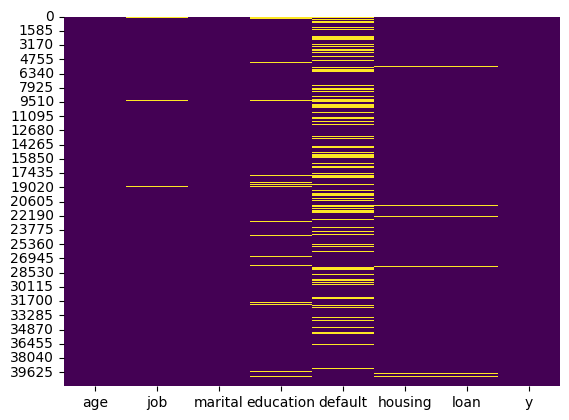

In [5]:
cat_col=[]
for column in df.columns:
    if df[column].dtype == 'object':
        cat_col.append(column)
        df[column].replace('unknown', np.NaN, inplace=True)
print(df.isnull().sum())
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

job, education, default, housing and loan has missing values

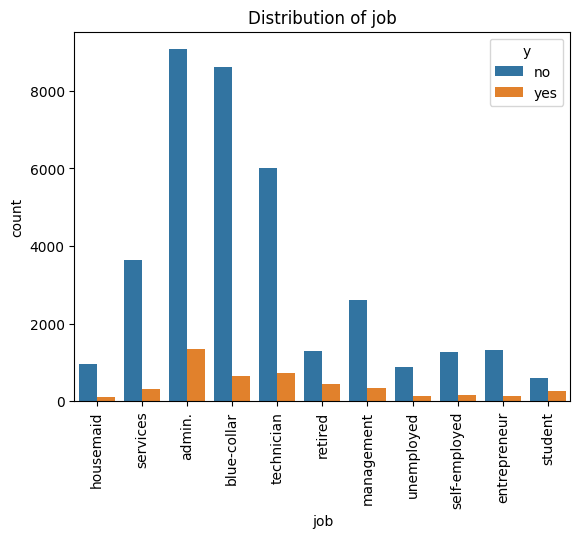

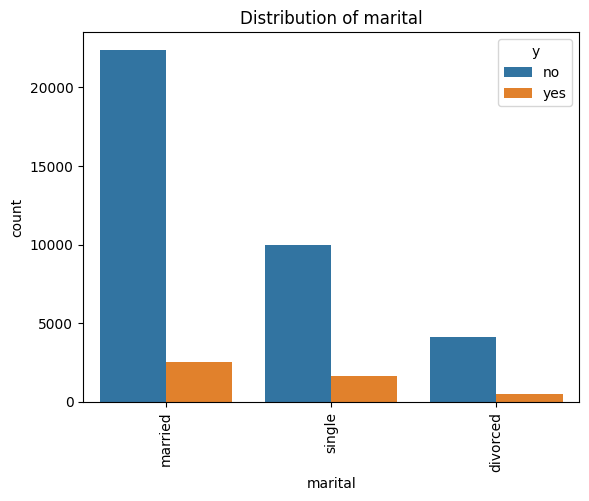

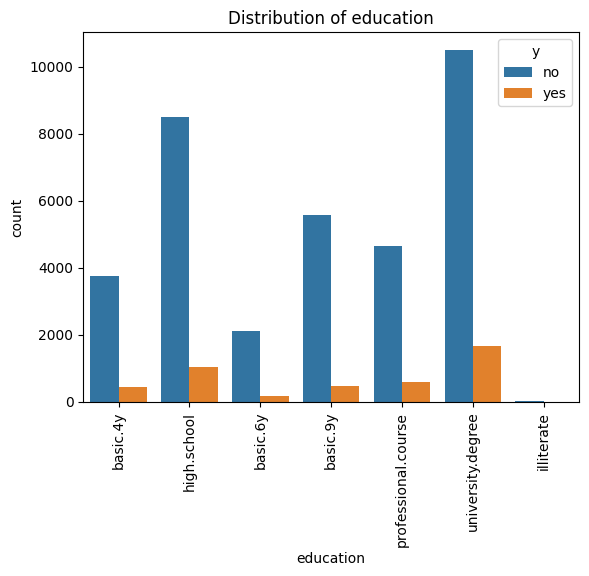

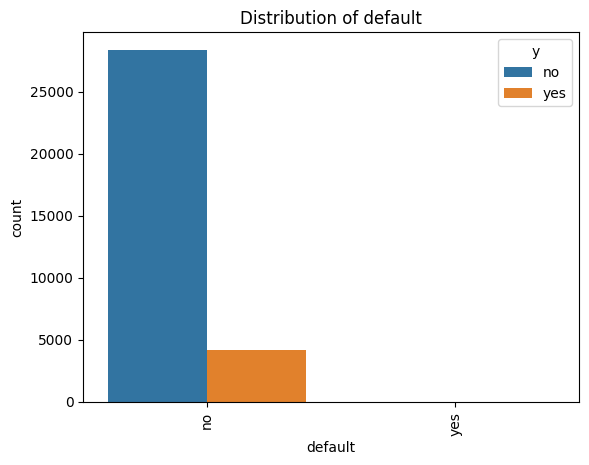

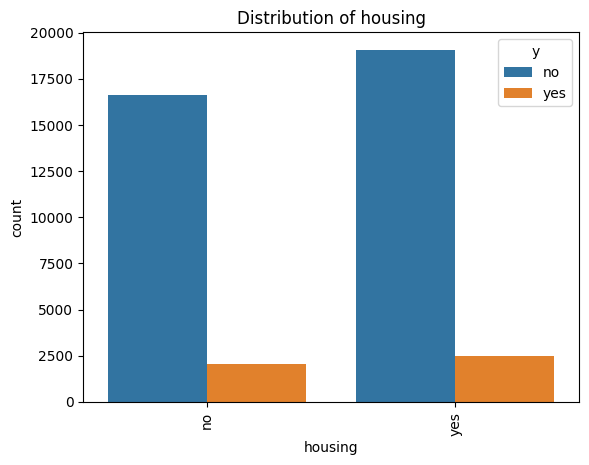

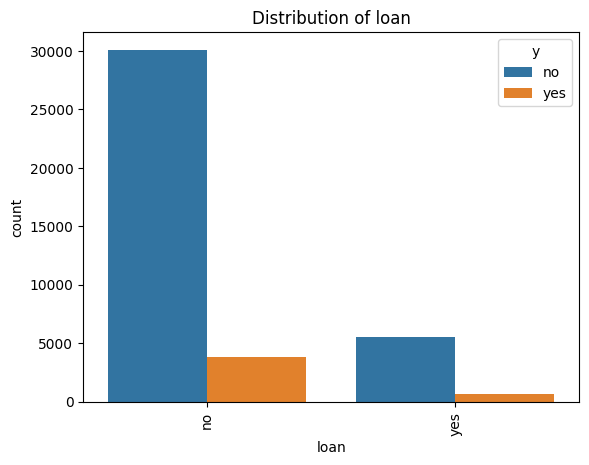

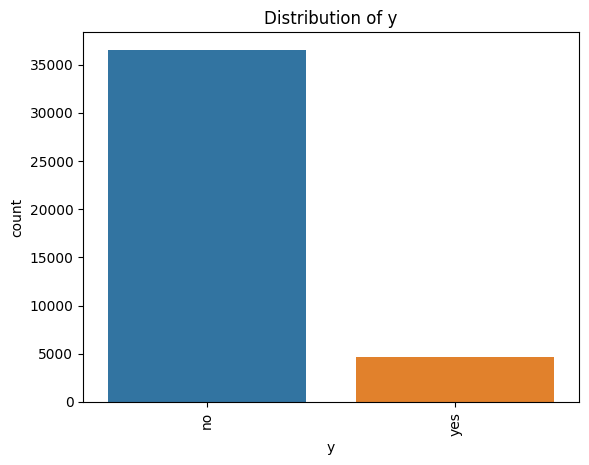

In [6]:
df_dropna=df.dropna()
selected_df=df_dropna.drop(['age'], axis=1)
for col in selected_df.columns:
    sns.countplot(x=col,hue='y', data=df,)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

Inference:

->Bank has more customer who has job in administrative and blue-collar

->illiterate customers are less in the bank

->It has a imbalanced class(y) 35000 as no and 5000 as yes,

In [7]:
cols=cat_col
mm = MinMaxScaler()
mappin = dict()
for variable in cols:
    mappings = {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}
    mappin[variable] = mappings

for variable in cols:
    df[variable] = df[variable].map(mappin[variable])
# print(df.isnull().sum())
df_dropna=df.dropna()

df_mode=df.fillna(df.mode().iloc[0])

#Minmaxscaler and KNN imputation
sca = mm.fit_transform(df)
knn_imputer = KNNImputer()
knn = knn_imputer.fit_transform(sca)
df.iloc[:,:] = mm.inverse_transform(knn)
for i in cols:
    df[i] = round(df[i]).astype('int')

df  = df.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df_dropna  = df_dropna.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df_mode  = df_mode.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())


print(df.isnull().sum())
df,df_mode,df_dropna

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
y            0
dtype: int64


<ipython-input-7-85c7c89028e7>:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,:] = mm.inverse_transform(knn)


(            age  job  marital  education  default  housing  loan    y
 0      0.481481  0.0      0.0   0.000000      0.0      0.0   0.0  0.0
 1      0.493827  0.1      0.0   0.166667      0.0      0.0   0.0  0.0
 2      0.246914  0.1      0.0   0.166667      0.0      1.0   0.0  0.0
 3      0.283951  0.2      0.0   0.333333      0.0      0.0   0.0  0.0
 4      0.481481  0.1      0.0   0.166667      0.0      0.0   1.0  0.0
 ...         ...  ...      ...        ...      ...      ...   ...  ...
 41183  0.691358  0.5      0.0   0.666667      0.0      1.0   0.0  1.0
 41184  0.358025  0.3      0.0   0.666667      0.0      0.0   0.0  0.0
 41185  0.481481  0.5      0.0   0.833333      0.0      1.0   0.0  0.0
 41186  0.333333  0.4      0.0   0.666667      0.0      0.0   0.0  1.0
 41187  0.703704  0.5      0.0   0.666667      0.0      1.0   0.0  0.0
 
 [41188 rows x 8 columns],
             age  job  marital  education  default  housing  loan    y
 0      0.481481  0.0      0.0   0.000000      0

Creating the correlation matrix for the dataset

In [8]:
print(f'\n\nTotal duplicate rows: {df.duplicated().sum()}')
df= df.drop_duplicates()



Total duplicate rows: 30020


<Axes: >

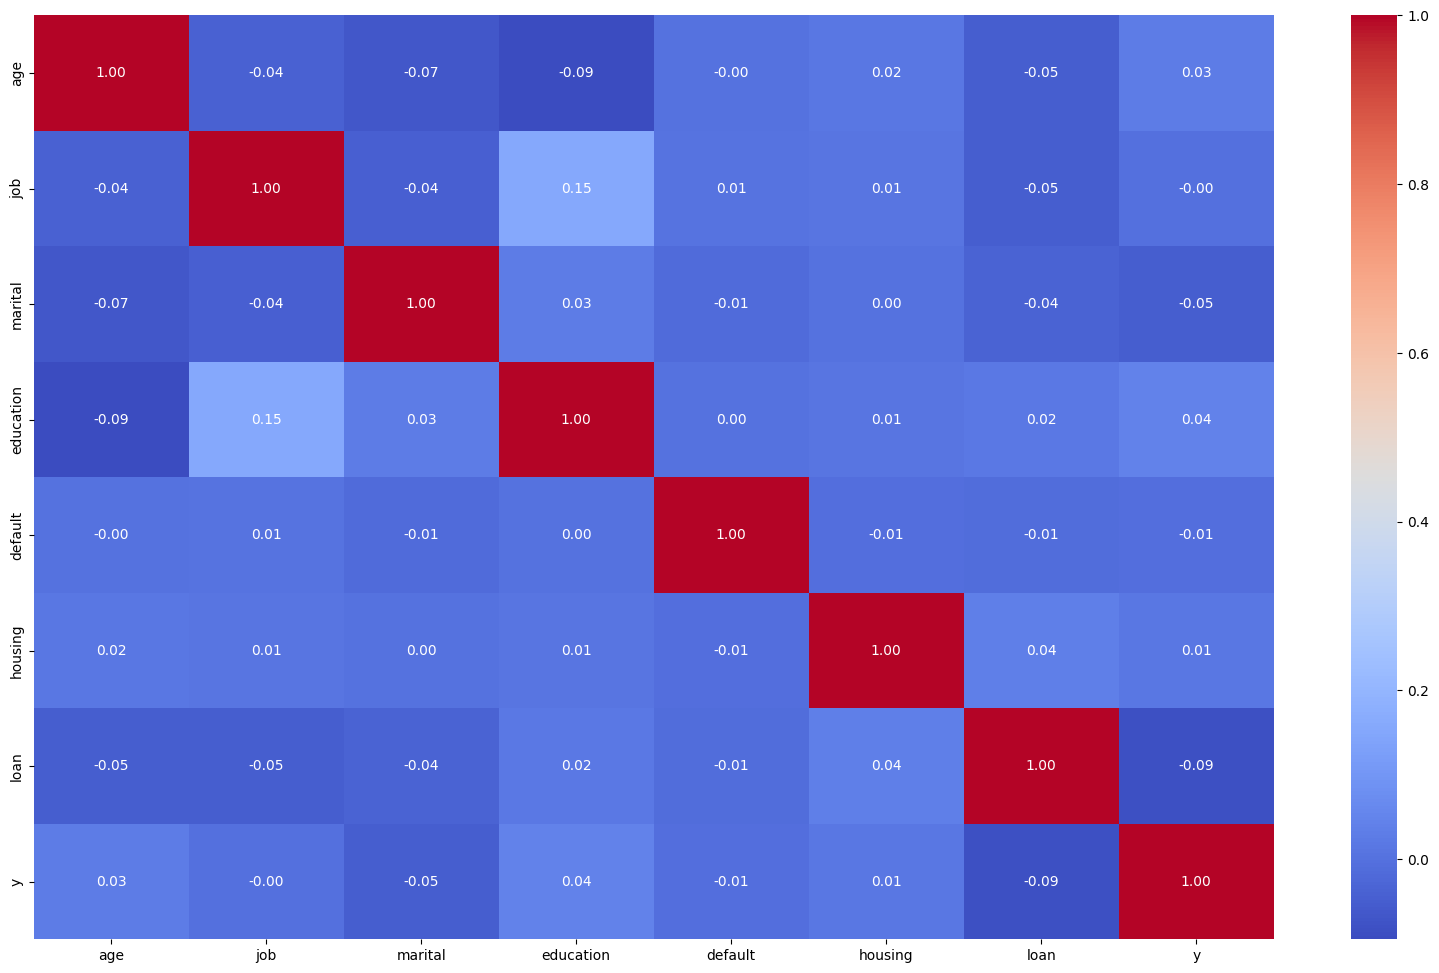

In [9]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Inference

education is correlated with job column

job,default,housing are less correlated with y so we can remove those columns for training

Generating a pairplot for the dataset with the hue as 'y'

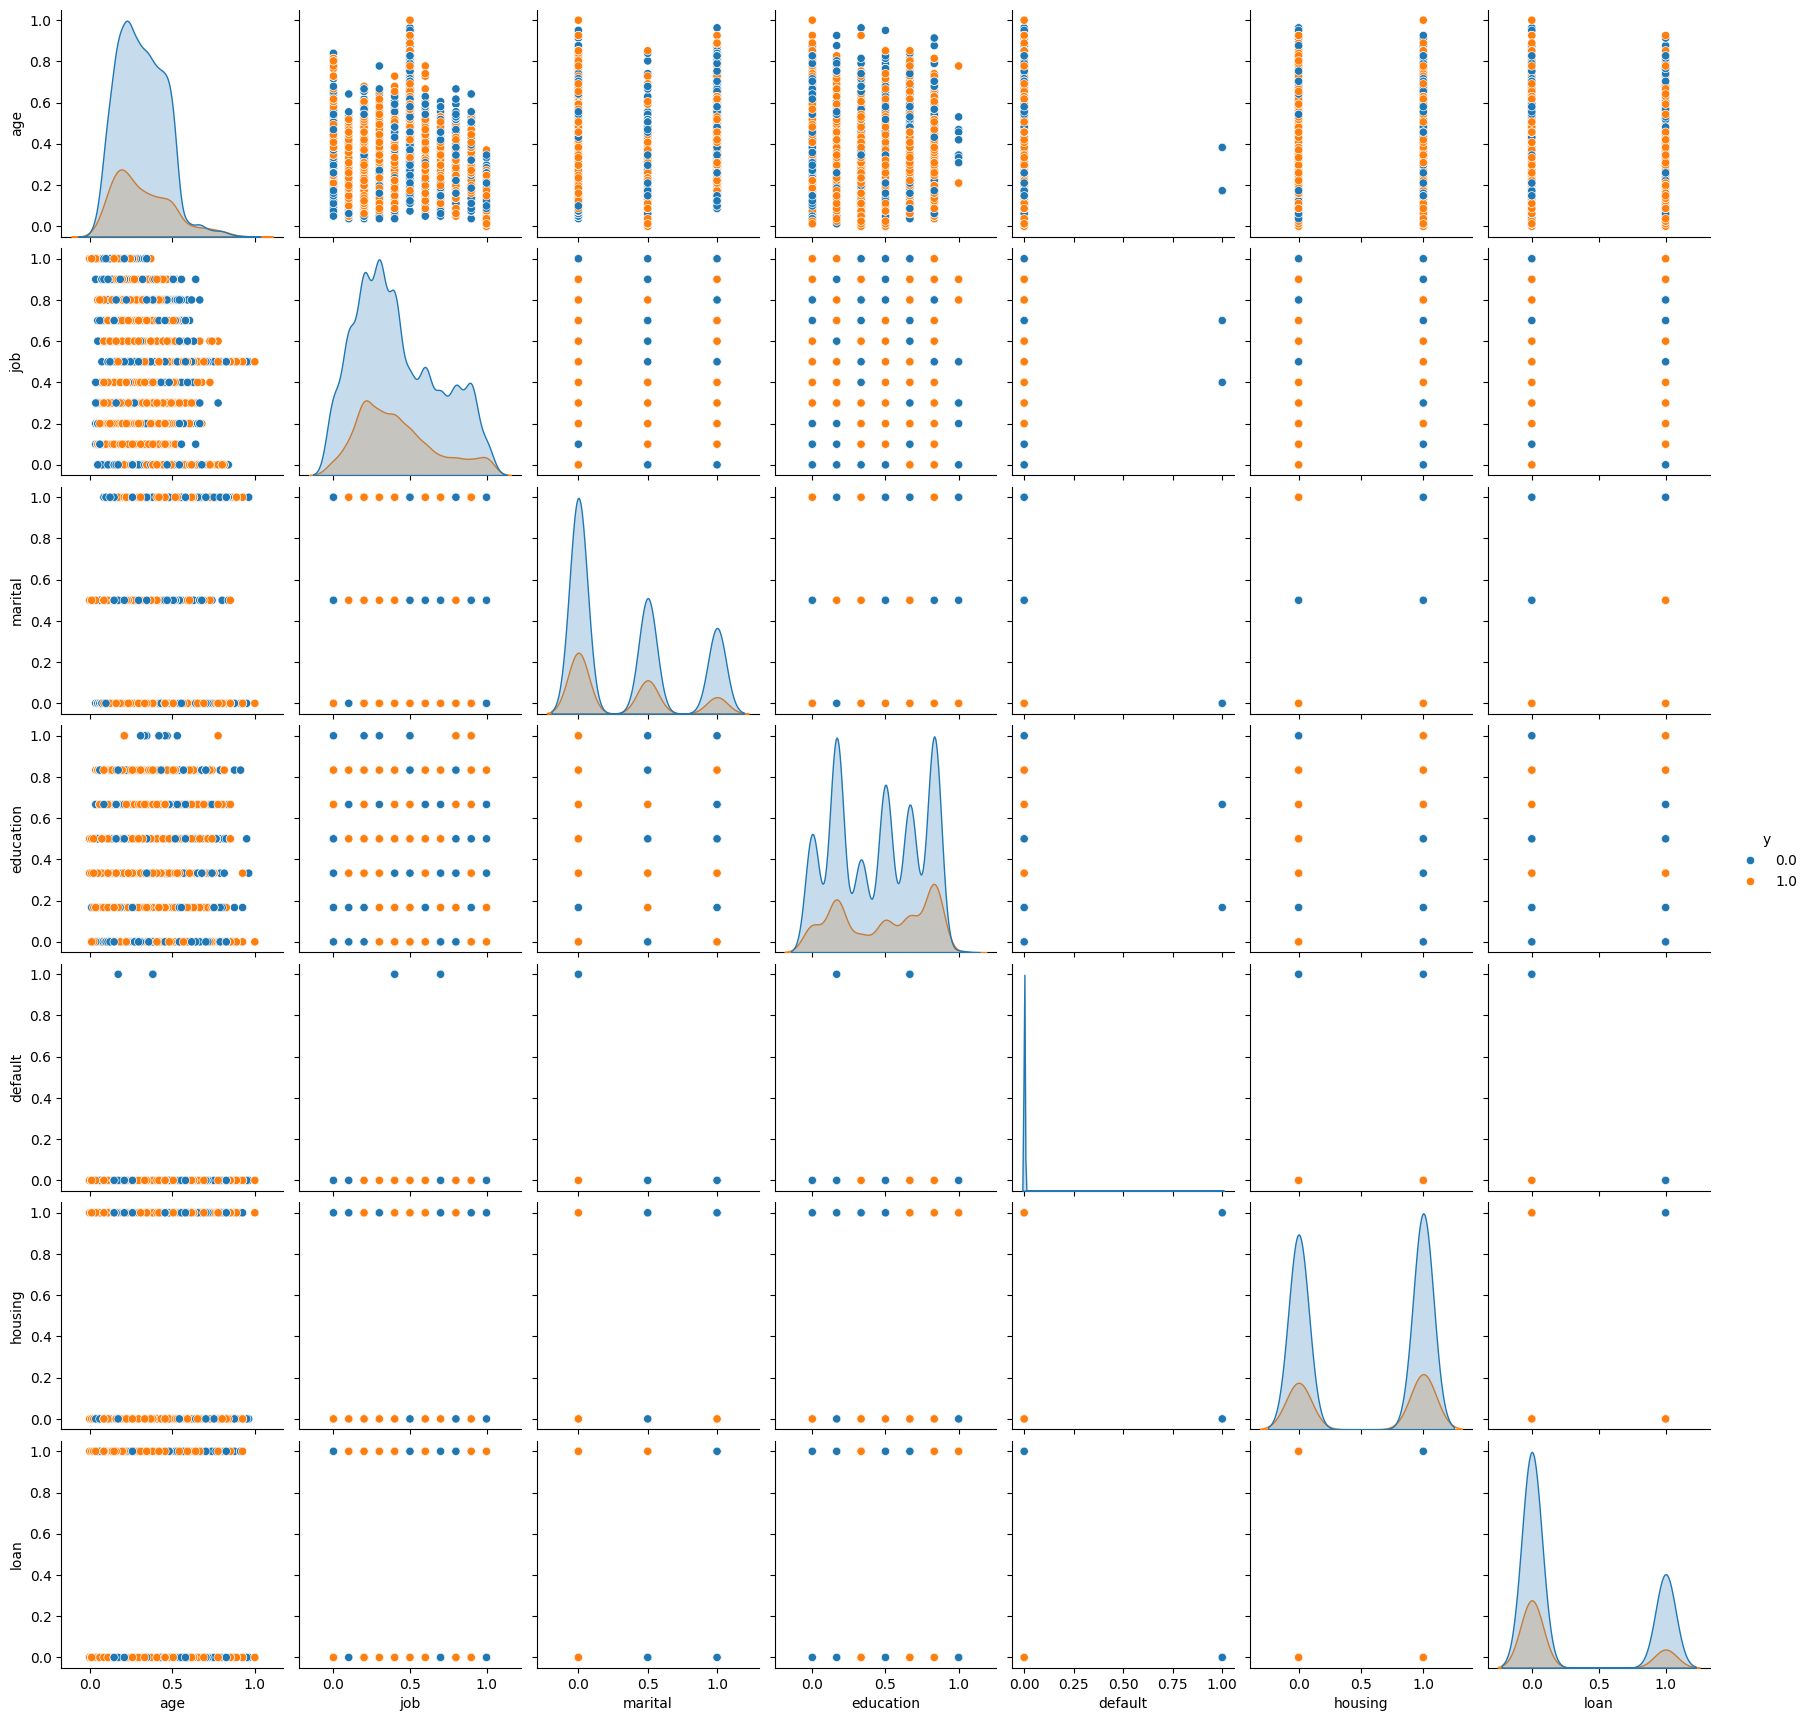

In [10]:
sns.pairplot(df,hue='y', diag_kind='kde')

Inference:

Age is uniformly distributed

Default column is right skewed

If they have loan and married, then they definitly have long term subscription

If they not have loan and divorsed, then they not take subscription

Creating input feature and target variable arrays for the prediction

In [11]:
X=df.drop(['y'],axis=1)
y=df['y']
X,y

(            age  job  marital  education  default  housing  loan
 0      0.481481  0.0      0.0   0.000000      0.0      0.0   0.0
 1      0.493827  0.1      0.0   0.166667      0.0      0.0   0.0
 2      0.246914  0.1      0.0   0.166667      0.0      1.0   0.0
 3      0.283951  0.2      0.0   0.333333      0.0      0.0   0.0
 4      0.481481  0.1      0.0   0.166667      0.0      0.0   1.0
 ...         ...  ...      ...        ...      ...      ...   ...
 41176  0.259259  0.0      1.0   0.166667      0.0      1.0   1.0
 41179  0.580247  0.5      1.0   0.666667      0.0      1.0   0.0
 41182  0.148148  0.7      0.5   0.000000      0.0      1.0   0.0
 41183  0.691358  0.5      0.0   0.666667      0.0      1.0   0.0
 41186  0.333333  0.4      0.0   0.666667      0.0      0.0   0.0
 
 [11168 rows x 7 columns],
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 41176    0.0
 41179    0.0
 41182    0.0
 41183    1.0
 41186    1.0
 Name: y, Length: 11168, 

Splitting the target and feature variables as test and train sets

In [12]:
def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)

    num_test_samples = int(test_size * num_samples)

    test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False)

    mask_train = np.ones(num_samples, dtype=bool)
    mask_train[test_indices] = False

    X_train, X_test = X[mask_train], X[~mask_train]
    y_train, y_test = y[mask_train], y[~mask_train]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 58.36%
Confusion Matrix:
[[1888  707]
 [ 688   67]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      2595
         1.0       0.09      0.09      0.09       755

    accuracy                           0.58      3350
   macro avg       0.41      0.41      0.41      3350
weighted avg       0.59      0.58      0.59      3350



In [15]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X,y)
X_train, X_test, y_train, y_test = custom_train_test_split(X1, y1, test_size=0.3, random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 63.24%
Confusion Matrix:
[[1757  803]
 [1075 1474]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.69      0.65      2560
         1.0       0.65      0.58      0.61      2549

    accuracy                           0.63      5109
   macro avg       0.63      0.63      0.63      5109
weighted avg       0.63      0.63      0.63      5109



Creating a custom decision tree class with methods for fitting the model and making predictions.The tree-building process uses recursive splitting based on entropy to create a decision tree

In [17]:
class decision_Tree:

    def __init__(self):
        self.no_of_unique=11  # Number of unique values that should be present for a feature to be categorized as categorical or continuous
        self.counter=0 # counter to count the current depth of tree
        self.min_samples=100 # sample rate
        self.max_depth=100 #control depth of tree

    def type_of_cols(self,data):
        # initialize lists to store column type
        col_type=[]
        # move in each column
        for col in data.columns[:-1]:
            # get number of unique values in the feature
            no_of_col_unique= data[col].nunique()

            # check for categorical feature
            if data[col].dtypes==object or no_of_col_unique <= self.no_of_unique:
                col_type.append("categorical")

            # if not categorical then it is a continuous feature
            else:
                col_type.append("continuous")
        return col_type

    # the function is used to get all possible splits for the data
    def get_splits(self,data):

        splits = {} # dictonary That saves the possible splits of our data based on data-type
        feature_type=self.type_of_cols(data) # Get data-type categorical or continuous for each column

        # moving in for each feature excluding the last column which is the label
        for column_index in range(data.shape[1]-1):
            values = data.iloc[:, column_index] # getting all the feature value based on the feature names
            unique_values = np.unique(values) #fetch the unique values of the respective features
            type_of_feature = feature_type[column_index] # get data-type of column i.e categorial or continues

            # handling spkit for continuous data
            if type_of_feature == "continuous":
                splits[column_index] = []

                # passing through all unique values
                for index in range(len(unique_values)):
                  if index != 0:
                        current_value = unique_values[index]
                        previous_value = unique_values[index - 1]
                        split = (current_value + previous_value) / 2 # performing split
                        splits[column_index].append(split) #saving the split
            # for a categorical feature ther must be at least 2 unique values, else in the
            # split_data function data_below would contain all data points and data_above would be None
            # thus checking for the above mentioned situation as well
            elif len(unique_values) > 1:
                splits[column_index] = unique_values
        # return splits
        return splits

    def split_data(self,data, column, value):

        #based on to column's data type we will destribute the data into two partitions
        feature_type=self.type_of_cols(data)
        split_values = data.iloc[:,column]
        type_of_feature = feature_type[column]

        # in case of continues data we will use greater or lesser than operator
        if type_of_feature == "continuous":
            left = data[split_values <= value]
            right = data[split_values >  value]

        # in case of categorial data will use logical equal or not equal operator
        else:
            left = data[split_values == value]
            right = data[split_values != value]

        return left,right

    #functions to calculate the entropy
    def entropy(self,data):
        # we are calculating the entropy
        prob=list(dict(data.iloc[:, -1].value_counts(normalize=True)).values())
        entropy = sum(prob* -np.log2(prob))
        return entropy

    # entropy of sub-splits tree
    def entropy_data(self,left,right):
        n = len(left) + len(right)
        p_left = len(left) / n
        p_right = len(right) / n
        entropy_ =  (p_left * self.entropy(left)+ p_right *self.entropy(right))
        return entropy_

    # based on the entropy, calculate the best splits
    def best_split(self,data,splits):

        entropy = 99999
        # iterating over the splits obtained by the get_split method for each feature
        for col in splits:
            # iterating over the splits of a indivisual feature
            for val in splits[col]:

                # spliting the data according to obtained split(val) of a column
                left, right = self.split_data(data, column=col, value=val)

                # calculating the entropy for the column
                current_entropy = self.entropy_data(left,right)
                # in case where obtained entropy is lesser than assumed entropy
                # then assume the obtained entropy as best entropy
                # and the current column can be termend as best column and the split too
                if current_entropy <= entropy:
                    entropy = current_entropy
                    best_column = col
                    best_split = val

        # return best split and column
        return best_column, best_split

    # for the next step let's work on a function to build our decision tree
    # it is the base function for fitting the data
    def _tree_builder(self,df):

        # data preparations
        column=df.columns #store the column name
        feature_type=self.type_of_cols(df) # store the column value type i.e categorial/continues
        data = df

        # base case for recursion
        # checking for hyper-parameter conditions
        if  (df.iloc[:,-1].nunique()==1) or (len(data) < self.min_samples) or (self.counter == self.max_depth):
            classes= Counter(df.iloc[:,-1]).most_common(1)[0][0]
            return classes

        # recursive part
        else:
            self.counter += 1
            splits = self.get_splits(data)# calculating the splits of each columns
            split_column, split_value = self.best_split(data,splits) # getting the best column and split value
            left, right = self.split_data(data, split_column, split_value) # based on the above split and column divide the data
            # for better visualization of tree
            # after training we can see the tree in the {object}.tree variable
            # determine question
            # here we are trying to ask the question if our feature and split value have completed the classification task or not
            # also adding to this we also keep track of the base while recursion

            feature_name = column[split_column] # pick the column name
            type_of_feature = feature_type[split_column] # get type of the column
            # in case of a feature with continuous values we have right and left sub tree based on condition
            # The values in the dataset of the particular feature are less than or equals to the best split value
            if type_of_feature == "continuous":
                question = "{} <= {}".format(feature_name, split_value)

            # feature is categorical
            # we have a question if the values from the dataset is equal to the optimal categorical split value or not
            else:
                question = "{} = {}".format(feature_name, split_value)

            mytree = {question: []}


            # work on building right and left sub trees
            ans_yes = self._tree_builder(left) # left leave is for yes where tree traversal stops
            ans_no = self._tree_builder(right) # right leave needs few more nodes


            # If the answers are the same, no need to append
            if ans_yes == ans_no:
                mytree = ans_yes
            else:
                mytree[question].append(ans_yes)
                mytree[question].append(ans_no)
            return mytree

    def fit(self,X,y):

        # sending complete data as input with last column as our target feature
        X["output"]=y

        # calling the tree builder function
        self.tree=self._tree_builder(X)
        return self.tree

    # base predict function
    def _predict(sf,dx,tree):
        root_node = list(tree.keys())[0] # fetch the root node's value i.e our dict keys which consits of column name,operator and split value
        column,operator,split=root_node.split(" ") # we have used the space as a seprator b/w the three data
        if operator == "<=": # if the operator is lesser than or equal it means th column type is continues

            if dx[column] <= float(split):
                result = tree[root_node][0]
            else:
                result = tree[root_node][1]

        # if column  is categorical then we can use logical equal operator
        else:
            if str(dx[column]) == split:
                result = tree[root_node][0]
            else:
                result = tree[root_node][1]

        if type(result)!=dict: # if the result is dict then we have more nodes to be traversed
            return result
        # else recursively travers the entire tree for accurate results
        else:
            return sf._predict(dx,result)

    def predict(self,X_test):
        s=[]
        for i in range(X_test.shape[0]):
            s.append(self._predict(X_test.iloc[i],self.tree))

        return s


Creating an instance of the decision tree class and assigning it to a variable 'dt_clf'

In [18]:
dt_clf=decision_Tree()
dt_clf.fit(X_train,y_train)

<ipython-input-17-db437c84650d>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["output"]=y


{'age <= 0.5312666437182835': [{'loan = 1.0': [{'job <= 0.9119655828750461': [{'job <= 0.8995043622816385': [{'education <= 0.6680282663200012': [{'job <= 0.010838193400520002': [0.0,
            {'marital = 1.0': [{'job <= 0.19616412078515724': [0.0,
                {'age <= 0.4950434386976742': [{'education = 0.6342456224466374': [1.0,
                    {'education = 0.6081511405393891': [1.0,
                      {'education = 0.5676135980268934': [1.0,
                        {'education = 0.5317860017049658': [1.0,
                          {'job = 0.4596781843739762': [1.0,
                            {'job = 0.3606979422384163': [1.0,
                              {'job = 0.2924791209648009': [1.0,
                                {'job = 0.2781375616186279': [1.0,
                                  {'age <= 0.12345679012345676': [1.0,
                                    0.0]}]}]}]}]}]}]}]}]},
                  0.0]}]},
              {'job <= 0.8056145384123845': [{'job <= 0.10

In [19]:
custom_y_pred = dt_clf.predict(X_test)

Calculating accuracy and classification report for the custom model


Accuracy: 64.18%
Confusion Matrix:


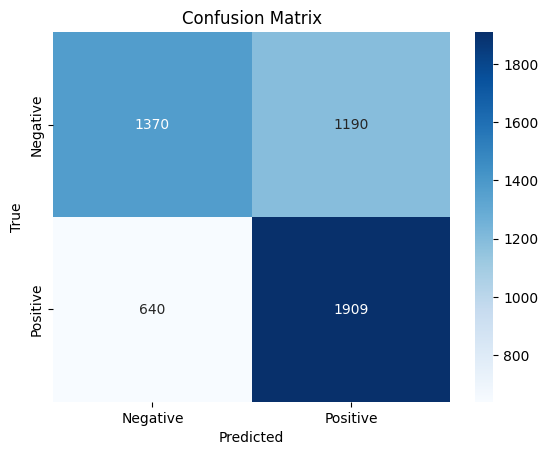

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.54      0.60      2560
         1.0       0.62      0.75      0.68      2549

    accuracy                           0.64      5109
   macro avg       0.65      0.64      0.64      5109
weighted avg       0.65      0.64      0.64      5109



In [20]:
accuracy = accuracy_score(y_test,custom_y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
cm=confusion_matrix(y_test,custom_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test,custom_y_pred))

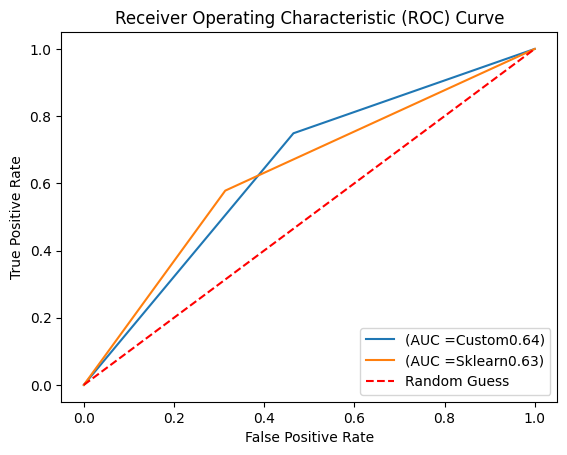

In [21]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc

models={'Custom':custom_y_pred,'Sklearn':y_pred}
for model_name, model_prob in models.items():
  fpr, tpr, thresholds = roc_curve(y_test,model_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'(AUC ={model_name}{roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

custom and sklearn model has 0.64 as AUC score, we need to improve the model.